PART 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
data = pd.read_csv('aqi.csv')
data.drop(['date', 'area', 'unit', 'note'], axis=1, inplace=True)
le = LabelEncoder()
for col in ['state', 'prominent_pollutants', 'air_quality_status']:
    data[col] = le.fit_transform(data[col])
target_col = 'air_quality_status'
x_cols = [x for x in data.columns if x != target_col]
msc = MinMaxScaler()
data[x_cols] = msc.fit_transform(data[x_cols])

# Taking a sample for speed 
data_sampled = data.sample(n=2000, random_state=42)
X_data = data_sampled[x_cols]
y_data = data_sampled[target_col].astype(int)

PART 2

In [ ]:
def accuracy(real, predict):
    return sum(np.array(real) == np.array(predict)) / float(len(real))
score_list = list()

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    y_pred = knn.predict(X_data)
    score = accuracy(y_data, y_pred)
    score_list.append((k, score))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])


PART 3

----------------------------
   K Value  |  Accuracy     
----------------------------
      1     |  1.0000
      2     |  0.9640
      3     |  0.9590
      4     |  0.9415
      5     |  0.9420
      6     |  0.9365
      7     |  0.9335
      8     |  0.9330
      9     |  0.9240
      10    |  0.9205
      11    |  0.9170
      12    |  0.9075
      13    |  0.9085
      14    |  0.9035
      15    |  0.9050
      16    |  0.8965
      17    |  0.9060
      18    |  0.9040
      19    |  0.8985
      20    |  0.8960
----------------------------


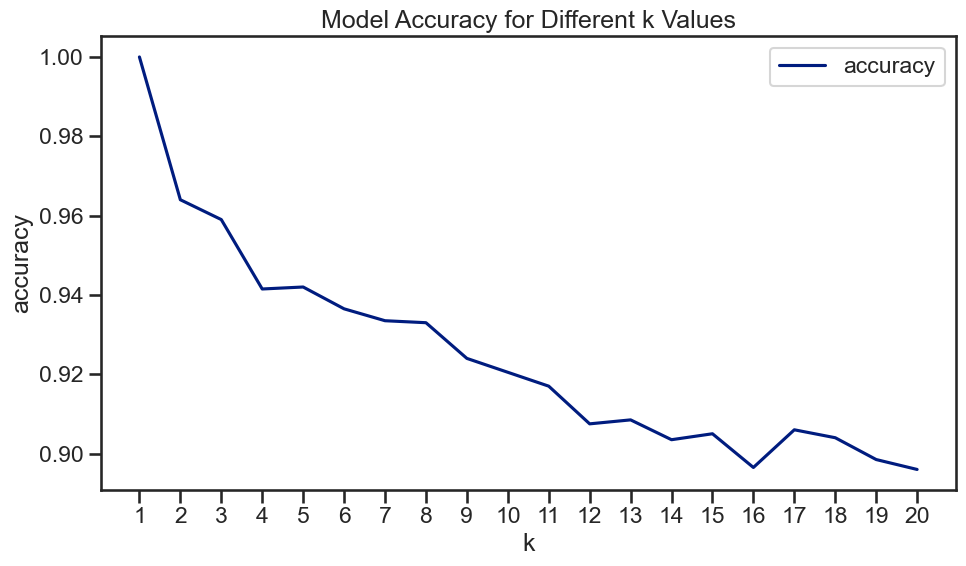

In [ ]:
print("----------------------------")
print("   K Value  |  Accuracy     ")
print("----------------------------")
for index, row in score_df.iterrows():
    print(f"      {int(row['k']):<5} |  {row['accuracy']:.4f}")
print("----------------------------")
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = score_df.set_index('k').plot(figsize=(10, 6))
ax.set(xlabel='k', ylabel='accuracy', title='Model Accuracy for Different k Values')
ax.set_xticks(range(1, 21))
plt.tight_layout()
plt.savefig('aqi_accuracy_results.png')
plt.show()